# Text Classification

In [32]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split

In [33]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\amish\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [34]:
train_df = pd.read_csv("../data/train.csv")

In [35]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [36]:
X = train_df['text']

In [37]:
y = train_df['target']

In [38]:
X

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

# Text Preprocessing

In [39]:
def preprocess_text(input_text, use_stemming=True, use_lemmatization=True):
    # Convert to lowercase
    preprocessed_text = input_text.lower()
    
    # Remove punctuation
    preprocessed_text = re.sub(r'[^\w\s]', '', preprocessed_text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(preprocessed_text)
    filtered_words = [word for word in word_tokens if word not in stop_words]
    
    # Initialize stemmer and lemmatizer
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    
    # Optionally apply stemming and lemmatization
    if use_stemming:
        filtered_words = [stemmer.stem(word) for word in filtered_words]
    if use_lemmatization:
        filtered_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    
    preprocessed_text = ' '.join(filtered_words)
    
    return preprocessed_text


In [40]:
X_preprocessed = [preprocess_text(text) for text in X]

In [41]:
X_preprocessed

['deed reason earthquak may allah forgiv u',
 'forest fire near la rong sask canada',
 'resid ask shelter place notifi offic evacu shelter place order expect',
 '13000 peopl receiv wildfir evacu order california',
 'got sent photo rubi alaska smoke wildfir pour school',
 'rockyfir updat california hwi 20 close direct due lake counti fire cafir wildfir',
 'flood disast heavi rain caus flash flood street manit colorado spring area',
 'im top hill see fire wood',
 'there emerg evacu happen build across street',
 'im afraid tornado come area',
 'three peopl die heat wave far',
 'haha south tampa get flood hah wait second live south tampa gon na gon na fvck flood',
 'rain flood florida tampabay tampa 18 19 day ive lost count',
 'flood bago myanmar arriv bago',
 'damag school bu 80 multi car crash break',
 'what man',
 'love fruit',
 'summer love',
 'car fast',
 'goooooooaaaaaal',
 'ridicul',
 'london cool',
 'love ski',
 'wonder day',
 'looooool',
 'wayi cant eat shit',
 'nyc last week',
 '

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [51]:
X_train

['courag honest analysi need use atom bomb 1945 hiroshima70 japanes militari refus surrend httpstcovhmtytptgr',
 'zachzaidman 670thescor wld b shame golf cart becam engulf flame boycottbear',
 'tell barackobama rescind medal honor given u soldier massacr wound knee sign amp rt httpstcou4r8driuac',
 'worri ca drought might affect extrem weather dampen economi httptcofdzzumyw8i',
 'youngheroesid lava blast amp power red pantherattack jamilazzaini alifaditha',
 'wreckag conclus confirm mh370 malaysia pm investig famili httptcoyi54xrhqgb',
 'builder dental emerg ruin plan emot blackmail afternoon bump',
 'bmx issu areal flood advisori shelbi al till aug 5 900 pm cdt httptco62oddekvli',
 '360wisenew china stock market crash gem rubbl httptcoaod2ftbmgu',
 'robertoneill31 get hit foul ball sit hardli freak accid war zone',
 'one direct pick httptcoq2eblokev fan armi direction httptcoencmhz6y34 x1402',
 'inw alert spsgsp 852015 1040 pm 1115 pm edt picken counti strong thunderstorm impact httpt

In [48]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))

6090
6090
1523
1523


# Train model

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_val_vectors = vectorizer.transform(X_val)


In [62]:
# Save the CountVectorizer to a pickle file
vectorizer_filename = '../ref/vectorizer.pkl'
with open(vectorizer_filename, 'wb') as file:
    pickle.dump(vectorizer, file)

In [50]:
X_train_vectors

<6090x16621 sparse matrix of type '<class 'numpy.int64'>'
	with 58695 stored elements in Compressed Sparse Row format>

In [52]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_vectors, y_train)


LogisticRegression()

In [53]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_val_vectors)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")


Validation Accuracy: 0.7912015758371634


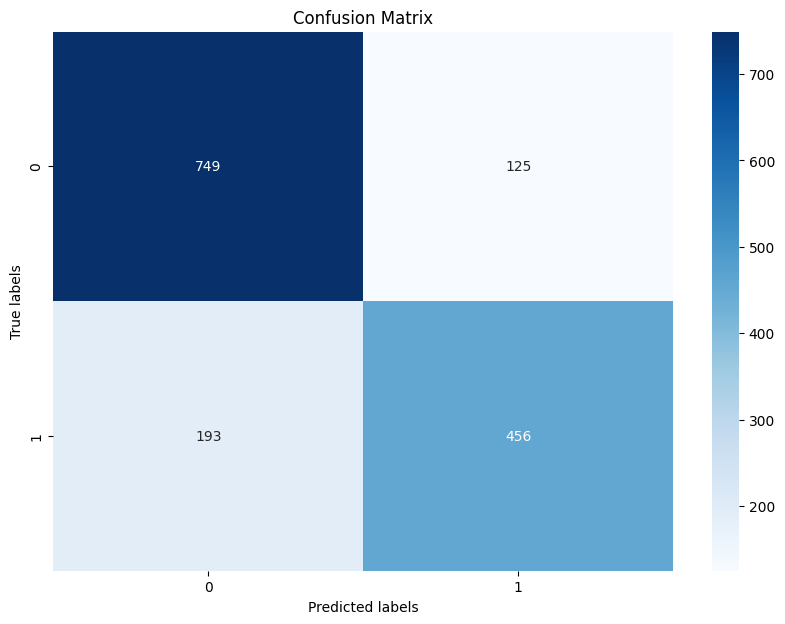

In [57]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_pred contains your model predictions and y_val contains the true labels
conf_matrix = confusion_matrix(y_val, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision
precision = precision_score(y_val, y_pred, average='binary')
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_val, y_pred, average='binary')
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_val, y_pred, average='binary')
print(f"F1 Score: {f1}")


Precision: 0.7848537005163512
Recall: 0.7026194144838213
F1 Score: 0.7414634146341463


In [61]:
import pickle

# Assuming `model` is your trained Logistic Regression model
model_filename = 'model.pkl'  # Path where the model will be saved

# Save the model as a pickle file
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")

# If you need a direct download link (in Jupyter Notebook, for example):
print(f"Download link: [Download Model]({model_filename})")


Model saved to model.pkl
Download link: [Download Model](model.pkl)
